In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.cm as cm

import numpy as np

import skimage.transform
from scipy import ndimage
import scipy.misc

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.axis('off')
  plt.show()

import tensorflow as tf
flags = tf.app.flags
import gflags as flags
FLAGS = flags.FLAGS

FLAGS('')

#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/ai-challenger/model/showattentell.finetune/', '')
  
import sys, os, math
import gezi, melt
import numpy as np

from deepiu.util import algos_factory
from deepiu.seq2seq.rnn_decoder import SeqDecodeMethod

#debug
from deepiu.util import text2ids

TEXT_MAX_WORDS = 100    
decode_max_words = 20


from deepiu.util import ids2text
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic-finetune/vocab.txt'
ids2text.init(vocab_path)

image_dir = image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
image_path = os.path.join(image_dir, image_file)

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_v4.ckpt'
image_model_name='InceptionV4'
model_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune/epoch/model.ckpt-34.10-1118821'

# image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/nasnet_large/model.ckpt'
# image_model_name='nasnet_large'
# model_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/model.v4/showattentell.bahdanau.nasnet.finetune.2gpu.lr0005/epoch/model.ckpt-13.30-436373'

image_model_name = melt.image.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
FLAGS.image_model_name = image_model_name
print(FLAGS.image_model_name)
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, feature_name='attention')
else:
  image_model = None
print('image_model', image_model)

import libpinyin
pinyin = libpinyin.Pinyin()
pinyin.Load('./data/pinyin/')

tensorflow_version: 1.5.0-dev20171205


INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic-finetune/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words
InceptionV4
image_model None


ENCODE_UNK 1


tough still here but not needed for inference

In [2]:
predictor = melt.TextPredictor(model_dir) 

load frozen graph from /home/gezi/mount/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune/epoch/model.ckpt-34.10-1118821.pb with mapfile /home/gezi/mount/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune/epoch/model.ckpt-34.10-1118821.map start


Instructions for updating:
Please file an issue at https://github.com/tensorflow/tensorflow/issues if you depend on this feature.


load frozen graph from /home/gezi/mount/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune/epoch/model.ckpt-34.10-1118821.pb with mapfile /home/gezi/mount/temp/image-caption/ai-challenger/model.v4/showattentell.coverage.inceptionV4.finetune/epoch/model.ckpt-34.10-1118821.map duration: 9.72157001495


In [3]:
def predict(image_path, predictor):
  img = melt.read_image(image_path)
  print(image_path)
  if image_model:
    feature = image_model.gen_feature(img) if image_model is not None else img
  else:
    feature = [img]

  timer = gezi.Timer()
  texts, scores = predictor.predict_text(feature)
  for i, (text, score) in enumerate(zip(texts[0], scores[0])):
    print(ids2text.ids2text(text), score)

  print('beam search using time(ms):', timer.elapsed_ms())

In [4]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [5]:
# while True:
#   image_name = raw_input('image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
#   image_name = image_name.strip().replace('file://', '')
#   if image_name == 'q':
#     break
#   if not image_name.endswith('.jpg'):
#     image_name += '.jpg'

#   image_path = os.path.join(image_dir, image_name)

#   if not os.path.exists(image_path):
#     print('path not exists:%s'%image_path)
#     image_path = image_name
#     if not os.path.exists(image_path):
#         continue
#   plt.subplot(1, 1, 1)
#   image_show(image_path)
#   predict(image_path, predictor)
#   #predict(image_path, predictor2, gen_feature=False)

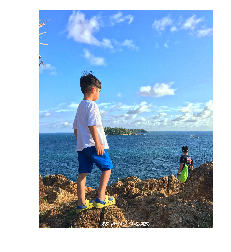

/home/gezi/data2/data/shijue/pic.fangshu/宝宝03.jpg
海边 的 礁石 上 站 着 一个 穿着 白色 上衣 的 男孩 </S> 0.0732079
一个 穿着 白色 上衣 的 男孩 站 在 海边 的 石头 上 </S> 0.0707773
一个 穿着 白色 上衣 的 孩子 站 在 海边 的 石头 上 </S> 0.06558
一个 穿着 白色 上衣 的 小孩 站 在 海边 的 石头 上 </S> 0.0643822
海边 的 石头 上 站 着 一个 穿着 白色 上衣 的 男孩 </S> 0.0534237
海边 的 礁石 上 站 着 一个 穿着 白色 上衣 的 小孩 </S> 0.0512843
海边 的 礁石 上 站 着 一个 穿着 白色 上衣 的 孩子 </S> 0.051221
一个 穿着 白色 上衣 的 男孩 站 在 海边 的 礁石 上 </S> 0.0396046
海边 的 石头 上 站 着 一个 穿着 白色 上衣 的 孩子 </S> 0.0378248
蔚蓝 的 天空 下 有 一个 穿着 白色 上衣 的 男孩 站 在 海边 的 石头 上 </S> 0.0238067
beam search using time(ms): 4191.04099274


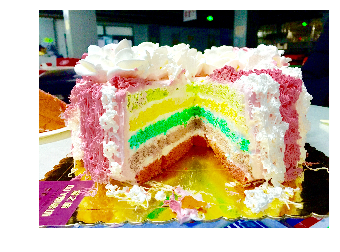

/home/gezi/data2/data/shijue/pic.fangshu/蛋糕01.jpg
一个 戴着 眼镜 的 男人 站 在 室内 的 桌子 旁 </S> 0.0127586
一个 戴着 眼镜 的 男人 站 在 室外 的 桌子 旁 </S> 0.010811
室外 有 一个 右手 拿 着 手机 的 女人 在 拍照 </S> 0.0087131
一个 戴着 眼镜 的 男人 站 在 室内 的 蛋糕 旁 </S> 0.0085956
室外 有 一个 戴着 帽子 的 男人 站 在 桌子 旁 </S> 0.00718871
室外 有 一个 戴着 眼镜 的 男人 站 在 摆 着 蛋糕 的 桌子 旁 </S> 0.00707295
室外 有 一个 戴着 帽子 的 男人 站 在 摆 着 蛋糕 的 桌子 旁 </S> 0.00665968
室外 有 一个 右手 拿 着 手机 的 女人 在 看 东西 </S> 0.00359672
室外 有 一个 戴着 眼镜 的 男人 站 在 摆 着 东西 的 桌子 旁 </S> 0.00281634
室外 有 一个 右手 拿 着 手机 的 女人 站 在 雕塑 旁 </S> 0.00279149
beam search using time(ms): 628.707885742


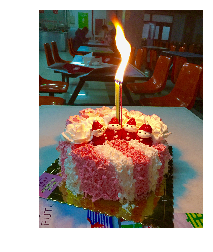

/home/gezi/data2/data/shijue/pic.fangshu/蛋糕02.jpg
房间 里 有 一个 双手 合十 的 男人 在 许愿 </S> 0.0254469
屋子里 有 一个 戴着 眼镜 的 男人 在 吹 蜡烛 </S> 0.019421
房间 里 有 一个 双手 合十 的 女人 在 许愿 </S> 0.0186882
房间 里 有 一个 双手 合十 的 男人 在 庆祝 生日 </S> 0.0181312
房间 里 有 一个 戴着 眼镜 的 男人 在 吹 蜡烛 </S> 0.0163866
屋子里 有 一个 戴着 眼镜 的 男人 在 吹 蛋糕 </S> 0.0148689
昏暗 的 房间 里 有 一个 双手 合十 的 男人 在 许愿 </S> 0.0134503
房间 里 有 一个 戴着 眼镜 的 男人 在 吹 蛋糕 </S> 0.0128193
房间 里 有 一个 双手 合十 的 男人 站 在 蛋糕 旁 </S> 0.0117799
房间 里 有 一个 双手 合十 的 男人 坐在 蛋糕 前 许愿 </S> 0.0116093
beam search using time(ms): 643.588066101


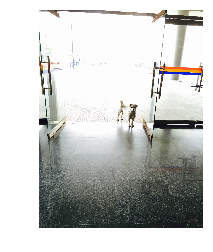

/home/gezi/data2/data/shijue/pic.fangshu/狗01.jpg
大厅 里 有 一个 双手 拿 着 拖把 的 男人 在 拖地 </S> 0.0160925
宽敞 的 大厅 里 有 一个 双手 拿 着 拖把 的 男人 在 拖地 </S> 0.01211
一个 戴着 帽子 的 男人 走 在 室内 的 走廊 上 </S> 0.00779949
一个 戴着 帽子 的 男人 走 在 室内 的 走廊 里 </S> 0.00774588
大厅 里 有 一个 双手 拿 着 拖把 的 男人 在 打扫卫生 </S> 0.00770296
一个 戴着 帽子 的 男人 推 着 一只 狗 走 在 大厅 里 </S> 0.00717937
大厅 里 有 一个 双手 拿 着 拖把 的 人 在 拖地 </S> 0.00697638
宽敞 的 大厅 里 有 一个 双手 拿 着 拖把 的 人 在 拖地 </S> 0.00627553
宽敞 的 大厅 里 有 一个 双手 拿 着 拖把 的 男人 在 打扫卫生 </S> 0.00477762
一个 戴着 帽子 的 男人 站 在 室内 的 走廊 上 </S> 0.00410847
beam search using time(ms): 655.675172806


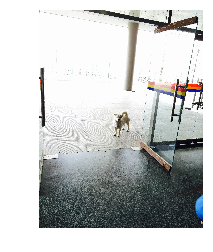

/home/gezi/data2/data/shijue/pic.fangshu/狗02.jpg
一只 狗 的 旁边 有 一个 戴着 帽子 的 男人 走 在 道路 上 </S> 0.00549672
一只 狗 的 旁边 有 一个 戴着 帽子 的 男人 站 在 道路 上 </S> 0.00520739
一只 狗 的 旁边 有 一个 左手 拿 着 东西 的 男人 走 在 道路 上 </S> 0.00427952
一只 狗 的 旁边 有 一个 戴着 帽子 的 男人 站 在 走廊 里 </S> 0.0035565
一只 狗 的 旁边 有 一个 戴着 帽子 的 男人 站 在 室内 </S> 0.0034024
一条 狗 的 旁边 有 一个 左手 拿 着 东西 的 男人 走 在 道路 上 </S> 0.00324419
一只 狗 的 旁边 有 一个 左手 拿 着 东西 的 男人 站 在 道路 上 </S> 0.00303982
一只 狗 的 旁边 有 一个 左手 拿 着 手机 的 男人 走 在 道路 上 </S> 0.00296553
一只 狗 的 旁边 有 一个 戴着 帽子 的 男人 站 在 走廊 上 </S> 0.00254388
一条 狗 的 旁边 有 一个 左手 拿 着 东西 的 男人 站 在 道路 上 </S> 0.00254326
beam search using time(ms): 631.896018982


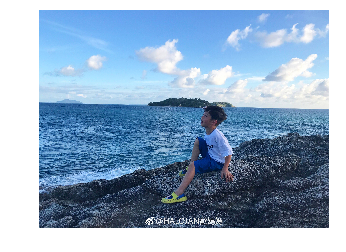

/home/gezi/data2/data/shijue/pic.fangshu/海洋01.jpg
一个 穿着 白色 上衣 的 女人 坐在 海边 的 石头 上 </S> 0.135099
一个 穿着 浅色 上衣 的 女人 坐在 海边 的 石头 上 </S> 0.0817536
一个 戴着 墨镜 的 女人 坐在 海边 的 石头 上 </S> 0.0737212
一个 穿着 白色 上衣 的 女人 坐在 海边 的 礁石 上 </S> 0.0661822
一个 穿着 白色 上衣 的 女人 坐在 海边 的 岩石 上 </S> 0.0641272
一个 穿着 短袖 的 女人 坐在 海边 的 石头 上 </S> 0.0600015
一个 穿着 裙子 的 女人 坐在 海边 的 石头 上 </S> 0.0574318
海边 的 礁石 上 坐 着 一个 穿着 白色 上衣 的 女人 </S> 0.0494659
一个 戴着 墨镜 的 女人 坐在 海边 的 礁石 上 </S> 0.0402038
一个 穿着 短袖 的 女人 坐在 海边 的 礁石 上 </S> 0.0382716
beam search using time(ms): 612.1571064


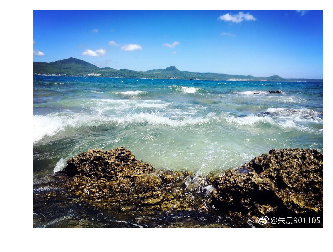

/home/gezi/data2/data/shijue/pic.fangshu/海洋02.jpg
一望无际 的 大 海边 站 着 一个 戴着 帽子 的 女人 </S> 0.0125248
一望无际 的 大 海边 站 着 一个 右手 抬起 的 女人 </S> 0.0117571
一望无际 的 大 海边 站 着 一个 双手 抬起 的 女人 </S> 0.0115194
一望无际 的 大 海边 站 着 一个 右手 拿 着 东西 的 女人 </S> 0.0107606
一望无际 的 大 海边 站 着 一个 双手 拿 着 东西 的 女人 </S> 0.0105257
蔚蓝 的 大 海边 站 着 一个 双手 拿 着 东西 的 女人 </S> 0.010362
蔚蓝 的 大 海边 站 着 一个 右手 拿 着 东西 的 女人 </S> 0.00953662
一望无际 的 大 海边 站 着 一个 右手 拿 着 东西 的 男人 </S> 0.00901973
一望无际 的 大 海边 站 着 一个 双手 放在 腿 上 的 女人 </S> 0.00845761
蔚蓝 的 大 海边 站 着 一个 右手 拿 着 东西 的 男人 </S> 0.00784425
beam search using time(ms): 519.227027893


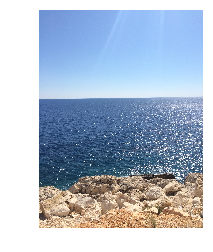

/home/gezi/data2/data/shijue/pic.fangshu/海洋03.jpg
一个 双手 放在 身前 的 女人 站 在 海边 的 石头 上 </S> 0.0196062
一个 双手 放在 身前 的 女人 站 在 海边 的 道路 上 </S> 0.0159531
一望无际 的 大 海边 站 着 一个 双手 放在 身前 的 女人 </S> 0.0147089
一望无际 的 大 海边 站 着 一个 双手 放在 腿 上 的 女人 </S> 0.0138593
一个 双手 放在 身前 的 女人 站 在 一望无际 的 海边 </S> 0.0134702
一望无际 的 大 海边 站 着 一个 双手 抬起 的 女人 </S> 0.0125652
蔚蓝 的 大 海边 站 着 一个 双手 放在 身前 的 女人 </S> 0.0123359
一望无际 的 大 海边 站 着 一个 双手 抬起 的 男人 </S> 0.0120165
海边 的 石头 上 站 着 一个 双手 放在 身前 的 女人 </S> 0.0112329
一望无际 的 大 海边 站 着 一个 双手 放在 腿 上 的 男人 </S> 0.00887528
beam search using time(ms): 596.108198166


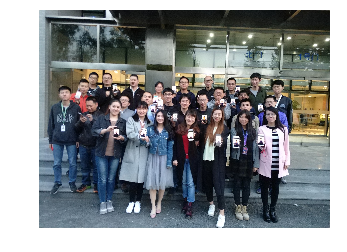

/home/gezi/data2/data/shijue/pic.fangshu/合照02.jpg
一群 衣着 休闲 的 人 站 在 房屋 外 的 道路 上 </S> 0.0304127
一群 穿着 各异 的 人 站 在 房屋 前 的 道路 上 </S> 0.0269554
一群 面带微笑 的 人 站 在 房屋 前 的 道路 上 </S> 0.0266662
一群 衣着 休闲 的 人 站 在 房屋 前 的 道路 上 </S> 0.025731
一群 衣着 各异 的 人 站 在 房屋 外 的 道路 上 </S> 0.0226354
一群 衣着 各异 的 人 站 在 房屋 前 的 道路 上 </S> 0.0217014
明亮 的 房间 里 站 着 一群 双手 拿 着 东西 的 人 </S> 0.0168395
一群 穿着 各异 的 人 站 在 房屋 前 的 空地 上 </S> 0.0164846
宽敞 的 大厅 里 站 着 一群 双手 拿 着 东西 的 人 </S> 0.015373
平坦 的 道路 上 站 着 一群 双手 拿 着 东西 的 人 </S> 0.0149305
beam search using time(ms): 740.6001091


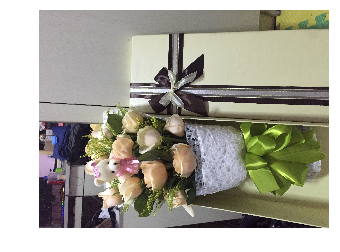

/home/gezi/data2/data/shijue/pic.fangshu/花01.jpg
房间 里 有 一个 右手 拿 着 话筒 的 女人 在 讲话 </S> 0.0174223
一个 戴着 眼镜 的 男人 站 在 室内 的 桌子 旁 </S> 0.0130019
一个 双手 拿 着 花 的 女人 站 在 房间 里 </S> 0.0126318
房间 里 有 一个 右手 拿 着 话筒 的 男人 在 讲话 </S> 0.0122507
房间 里 有 一个 右手 拿 着 话筒 的 女人 在 说话 </S> 0.0115681
一个 双手 拿 着 花 的 女人 站 在 室内 的 桌子 旁 </S> 0.0107886
一个 双手 拿 着 花 的 女人 站 在 房间 里 的 桌子 旁 </S> 0.00937787
一个 双手 拿 着 花 的 女人 站 在 屋子里 </S> 0.00935973
房间 里 有 一个 右手 拿 着 话筒 的 男人 在 说话 </S> 0.00840871
一个 穿着 白色 上衣 的 女人 站 在 房间 里 </S> 0.00826759
beam search using time(ms): 666.186094284


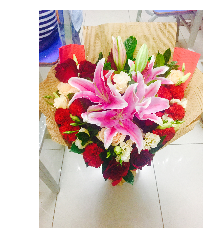

/home/gezi/data2/data/shijue/pic.fangshu/花02.jpg
房间 里 站 着 一个 双手 拿 着 花 的 女人 </S> 0.0197416
一个 双手 拿 着 花 的 女人 站 在 房间 里 </S> 0.0150685
明亮 的 房间 里 站 着 一个 双手 拿 着 花 的 女人 </S> 0.0139302
明亮 的 房间 里 站 着 一位 双手 拿 着 花 的 女士 </S> 0.0119646
一个 戴着 眼镜 的 男人 站 在 室内 的 讲台 旁 讲话 </S> 0.0104632
一个 戴着 眼镜 的 男人 站 在 室内 的 讲台 旁 </S> 0.0102886
一个 戴着 眼镜 的 女人 站 在 室内 的 讲台 旁 </S> 0.00916825
一个 右手 拿 着 花 的 女人 站 在 房间 里 </S> 0.00875539
一个 双手 拿 着 花 的 女人 站 在 室内 的 桌子 旁 </S> 0.00782748
一个 双手 拿 着 花 的 女人 站 在 房间 里 的 桌子 旁 </S> 0.00777455
beam search using time(ms): 707.261800766


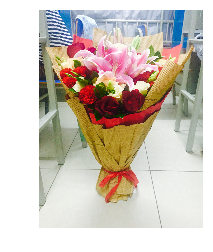

/home/gezi/data2/data/shijue/pic.fangshu/花03.jpg
一个 双手 捧 着 花 的 女人 站 在 房间 里 </S> 0.0474561
房间 里 站 着 一个 双手 捧 着 花 的 女人 </S> 0.0463256
房间 里 站 着 一个 双手 捧 着 鲜花 的 女人 </S> 0.0421818
明亮 的 房间 里 站 着 一个 双手 捧 着 花 的 女人 </S> 0.0396084
一个 双手 拿 着 花 的 女人 站 在 房间 里 </S> 0.0369955
一个 双手 捧 着 花 的 女人 站 在 光亮 的 房间 里 </S> 0.0324943
一个 双手 捧 着 花 的 女人 站 在 屋子里 </S> 0.0321106
一个 双手 捧 着 花 的 女人 站 在 光亮 的 屋子里 </S> 0.0283255
一个 双手 捧 着 花 的 女人 站 在 光亮 的 房子 里 </S> 0.0274326
一个 双手 拿 着 花 的 女人 站 在 光亮 的 房子 里 </S> 0.027116
beam search using time(ms): 632.314920425


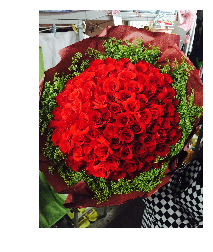

/home/gezi/data2/data/shijue/pic.fangshu/花04.jpg
一个 双手 捧 着 花 的 女人 站 在 房屋 外 </S> 0.0269417
一个 双手 拿 着 花 的 女人 站 在 房屋 外 </S> 0.0247054
一个 双手 拿 着 花 的 女人 站 在 屋外 的 道路 上 </S> 0.0197522
一个 双手 拿 着 花 的 女人 站 在 道路 上 </S> 0.0185567
一个 双手 拿 着 辣椒 的 女人 站 在 房屋 外 </S> 0.0185534
一个 双手 捧 着 花 的 男人 站 在 房屋 外 </S> 0.0166918
一个 双手 捧 着 花 的 女人 站 在 房屋 外 的 道路 上 </S> 0.01642
一个 双手 拿 着 花 的 男人 站 在 房屋 外 </S> 0.0158009
一个 双手 拿 着 花 的 女人 站 在 房屋 外 的 道路 上 </S> 0.014052
一个 双手 拿 着 花 的 女人 站 在 室外 的 桌子 旁 </S> 0.0136153
beam search using time(ms): 828.722953796


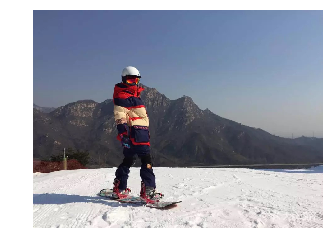

/home/gezi/data2/data/shijue/pic.fangshu/滑雪01.jpg
一个 双手 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.100052
一个 双手 拿 着 滑雪 杆 的 人 在 雪地 上 滑雪 </S> 0.0892468
一个 戴着 帽子 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0888238
一个 戴着 头盔 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0827248
一个 双手 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 里 滑雪 </S> 0.0755119
一个 双手 拿 着 滑雪 杆 的 人 在 滑雪场 上 滑雪 </S> 0.067639
一个 双手 拿 着 滑雪 杆 的 人 在 雪地 里 滑雪 </S> 0.0662285
一个 双手 拿 着 滑雪 杆 的 女人 在 雪地 上 滑雪 </S> 0.0574661
一个 双手 拿 着 滑雪 杖 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0566932
一个 双手 拿 着 滑雪 杆 的 女人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0548898
beam search using time(ms): 677.423000336


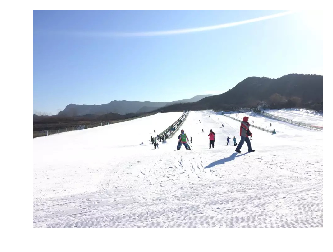

/home/gezi/data2/data/shijue/pic.fangshu/滑雪02.jpg
两个 手里 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0718426
两个 手里 拿 着 滑雪 杆 的 人 在 雪地 上 滑雪 </S> 0.0701322
两个 双手 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0665382
两个 戴着 帽子 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.058874
白雪皑皑 的 雪地 上 有 两个 戴着 帽子 的 人 在 滑雪 </S> 0.0561867
白雪皑皑 的 雪地 上 有 两个 双手 拿 着 滑雪 杆 的 人 在 滑雪 </S> 0.0547661
白茫茫 的 雪地 上 有 两个 戴着 帽子 的 人 在 滑雪 </S> 0.0546849
白茫茫 的 雪地 上 有 两个 双手 拿 着 滑雪 杆 的 人 在 滑雪 </S> 0.0503486
两个 手里 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 里 滑雪 </S> 0.0403241
白雪皑皑 的 雪地 上 有 两个 戴着 头盔 的 人 在 滑雪 </S> 0.039786
beam search using time(ms): 502.130031586


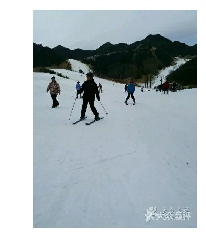

/home/gezi/data2/data/shijue/pic.fangshu/滑雪03.jpg
一群 双手 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0573019
一群 手里 拿 着 滑雪 杆 的 人 在 雪地 上 滑雪 </S> 0.0572716
一群 戴着 帽子 的 人 在 白茫茫 的 雪地 里 滑雪 </S> 0.0543476
一群 戴着 帽子 的 人 在 白雪皑皑 的 雪地 上 滑雪 </S> 0.0503935
一群 手里 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0485641
一群 戴着 帽子 的 人 在 白茫茫 的 雪地 上 滑雪 </S> 0.0461427
一群 双手 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 里 滑雪 </S> 0.0425349
一群 手里 拿 着 滑雪 杆 的 人 在 白茫茫 的 雪地 里 滑雪 </S> 0.040675
一群 衣着 休闲 的 人 在 白雪皑皑 的 雪地 里 滑雪 </S> 0.0400402
一群 戴着 帽子 的 人 在 白雪皑皑 的 雪地 里 滑雪 </S> 0.039644
beam search using time(ms): 512.367010117


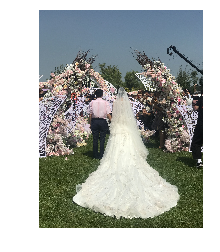

/home/gezi/data2/data/shijue/pic.fangshu/婚礼01.jpg
一个 穿着 西装 的 男人 和 一个 穿着 婚纱 的 女人 站 在 草地 上 </S> 0.0570677
一个 穿着 西装 的 男人 和 一个 穿着 婚纱 的 女人 站 在 绿油油 的 草地 上 </S> 0.0474191
一个 穿着 黑色 衣服 的 男人 和 一个 穿着 婚纱 的 女人 站 在 草地 上 </S> 0.032108
一个 穿着 深色 上衣 的 男人 和 一个 穿着 婚纱 的 女人 站 在 草地 上 </S> 0.0290915
一个 穿着 西装 的 男人 和 一个 穿着 婚纱 的 女人 站 在 草坪 上 </S> 0.027261
一个 穿着 婚纱 的 女人 和 一个 穿着 西装 的 男人 站 在 草地 上 </S> 0.0267876
一个 穿着 西装 的 男人 和 一个 穿着 婚纱 的 女人 站 在 绿油油 的 草坪 上 </S> 0.0252367
一个 穿着 黑色 衣服 的 男人 和 一个 穿着 婚纱 的 女人 站 在 绿油油 的 草地 上 </S> 0.023633
一个 穿着 深色 上衣 的 男人 和 一个 穿着 婚纱 的 女人 站 在 绿油油 的 草地 上 </S> 0.0204753
一个 穿着 婚纱 的 女人 和 一个 穿着 黑色 裤子 的 男人 站 在 草地 上 </S> 0.0203487
beam search using time(ms): 728.239059448


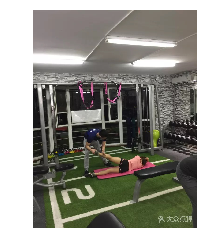

/home/gezi/data2/data/shijue/pic.fangshu/健身01.jpg
健身房 里 一个 人 的 旁边 有 一个 穿着 深色 上衣 的 男人 在 帮 一个 躺 在 健身器材 上 的 男人 锻炼 </S> 0.00810383
健身房 里 一个 男人 的 旁边 有 一个 穿着 深色 上衣 的 男人 在 帮 一个 躺 在 健身器材 上 的 男人 锻炼 </S> 0.00756234
健身房 里 一个 人 的 旁边 有 一个 穿着 深色 上衣 的 男人 在 帮 一个 躺 在 器材 上 的 男人 锻炼 </S> 0.00724182
健身房 里 一个 人 的 旁边 有 两个 人 在 帮 一个 躺 在 器材 上 的 男人 锻炼 </S> 0.00722638
健身房 里 一个 男人 的 旁边 有 一个 穿着 深色 上衣 的 男人 在 帮 一个 躺 在 器材 上 的 男人 锻炼 </S> 0.00702585
健身房 里 一个 人 的 旁边 有 两个 人 在 帮 一个 躺 在 器材 上 的 人 锻炼 </S> 0.00670336
健身房 里 两个 人 的 旁边 有 一个 穿着 深色 上衣 的 男人 在 帮 一个 躺 在 健身器材 上 的 男人 锻炼 </S> 0.00669549
健身房 里 一个 人 的 旁边 有 一个 穿着 蓝色 上衣 的 男人 在 帮 一个 躺 在 健身器材 上 的 男人 锻炼 </S> 0.00640946
健身房 里 一个 人 的 旁边 有 一个 穿着 蓝色 上衣 的 男人 在 帮 一个 躺 在 器材 上 的 男人 锻炼 </S> 0.00627104
健身房 里 两个 人 的 旁边 有 一个 穿着 深色 上衣 的 男人 在 帮 一个 躺 在 器材 上 的 男人 锻炼 </S> 0.00578821
beam search using time(ms): 527.677059174


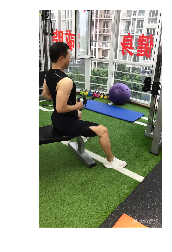

/home/gezi/data2/data/shijue/pic.fangshu/健身02.jpg
健身房 里 有 一个 穿着 黑色 背心 的 男人 在 锻炼 </S> 0.0772708
健身房 里 有 一个 穿着 黑色 背心 的 男人 在 健身 </S> 0.0645682
健身房 里 有 一个 穿着 黑色 衣服 的 男人 在 锻炼 </S> 0.0605461
健身房 里 有 一个 坐在 健身器材 上 的 男人 在 锻炼 </S> 0.0519455
健身房 里 有 一个 双手 拿 着 哑铃 的 男人 在 锻炼 </S> 0.0499611
健身房 里 有 一个 穿着 背心 的 男人 在 锻炼 </S> 0.0498864
健身房 里 有 一个 穿着 黑色 衣服 的 男人 在 健身 </S> 0.049797
健身房 里 有 一个 穿着 黑色 背心 的 男人 在 锻炼身体 </S> 0.0481428
健身房 里 有 一个 穿着 黑色 背心 的 男人 在 做 运动 </S> 0.0455763
健身房 里 有 一个 双手 拿 着 器材 的 男人 在 锻炼 </S> 0.0376573
beam search using time(ms): 524.330854416


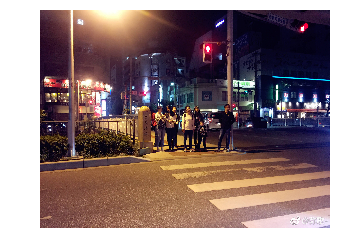

/home/gezi/data2/data/shijue/pic.fangshu/街景01.jpg
一群 衣着 各异 的 人 站 在 洒满 阳光 的 道路 上 </S> 0.0326629
一群 衣着 各异 的 人 站 在 平坦 的 道路 上 </S> 0.0250402
一群 衣着 各异 的 人 站 在 道路 上 的 汽车 旁 </S> 0.0221081
一群 衣着 各异 的 人 站 在 洒满 阳光 的 街道 上 </S> 0.0199832
一群 衣着 各异 的 人 站 在 宽敞 的 道路 上 </S> 0.0187396
一群 衣着 各异 的 人 站 在 宽阔 的 道路 上 </S> 0.0163559
三个 衣着 休闲 的 人 站 在 道路 上 的 汽车 旁 </S> 0.0150463
一群 衣着 各异 的 人 站 在 宽敞 的 街道 上 </S> 0.014813
一群 衣着 各异 的 人 站 在 道路 上 的 栏杆 旁 </S> 0.0143192
一群 衣着 各异 的 人 站 在 道路 上 的 护栏 旁 </S> 0.01298
beam search using time(ms): 584.674835205


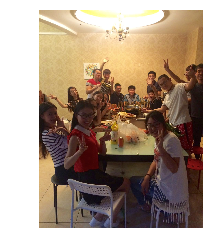

/home/gezi/data2/data/shijue/pic.fangshu/聚会01.jpg
明亮 的 房间 里 有 一群 坐 着 的 人 在 吃饭 </S> 0.0263992
明亮 的 餐厅 里 有 一群 坐 着 的 人 在 吃饭 </S> 0.0248564
明亮 的 房间 里 有 一群 坐在 椅子 上 的 人 在 吃饭 </S> 0.0241055
明亮 的 房间 里 有 一群 穿着 各异 的 人 在 吃饭 </S> 0.0227519
房间 里 有 一群 穿着 各异 的 人 在 吃饭 </S> 0.0219997
房间 里 有 一群 穿着 各异 的 人 在 吃 东西 </S> 0.0195725
明亮 的 房间 里 有 一群 坐 着 的 人 在 吃 东西 </S> 0.012331
明亮 的 餐厅 里 有 一群 坐 着 的 人 在 吃 东西 </S> 0.0103461
明亮 的 房间 里 有 一群 坐在 椅子 上 的 人 在 吃 东西 </S> 0.0101046
房间 里 一群 人 的 旁边 有 一个 戴着 眼镜 的 女人 坐在 椅子 上 </S> 0.00524497
beam search using time(ms): 535.417079926


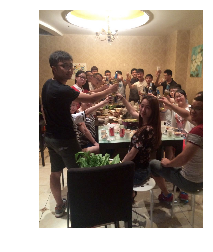

/home/gezi/data2/data/shijue/pic.fangshu/聚会02.jpg
大厅 里 一群 人 的 旁边 有 一个 左手 拿 着 手机 的 女人 在 拍照 </S> 0.00508972
大厅 里 一群 人 的 旁边 有 一个 左手 拿 着 手机 的 男人 在 拍照 </S> 0.00485026
大厅 里 一群 人 的 旁边 有 一个 右手 拿 着 手机 的 男人 在 拍照 </S> 0.00455702
大厅 里 一群 人 的 旁边 有 一个 左手 拿 着 手机 的 男人 在 给 一个 女人 拍照 </S> 0.0035313
大厅 里 一群 人 的 旁边 有 一个 右手 拿 着 手机 的 男人 在 给 一个 女人 拍照 </S> 0.00353067
大厅 里 一群 人 的 旁边 有 一个 左手 拿 着 手机 的 女人 在 给 一个 穿着 短袖 的 男人 拍照 </S> 0.00252036
大厅 里 一群 人 的 旁边 有 一个 左手 拿 着 手机 的 女人 在 给 一个 穿着 黑色 上衣 的 男人 拍照 </S> 0.0024258
大厅 里 一群 人 的 旁边 有 一个 左手 拿 着 手机 的 女人 在 给 一个 坐在 椅子 上 的 男人 拍照 </S> 0.00239872
大厅 里 一群 人 的 旁边 有 一个 穿着 黑色 上衣 的 女人 在 给 一个 穿着 短袖 的 男人 递 食物 </S> 0.00169034
大厅 里 一群 人 的 旁边 有 一个 穿着 黑色 上衣 的 女人 在 给 一个 穿着 短袖 的 男人 递 东西 </S> 0.00167193
beam search using time(ms): 551.52797699


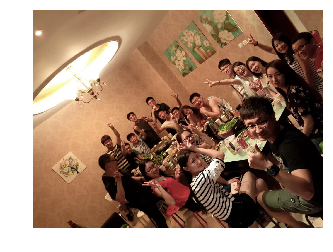

/home/gezi/data2/data/shijue/pic.fangshu/聚会03.jpg
一群 衣着 休闲 的 人 在 干净 的 房屋里 做 游戏 </S> 0.0112807
一群 衣着 休闲 的 人 在 干净 的 屋子里 做 游戏 </S> 0.0111966
明亮 的 房间 里 有 一群 形态各异 的 人 在 拍照 </S> 0.0102809
一群 衣着 休闲 的 人 在 宽敞 的 房屋里 做 游戏 </S> 0.00938546
明亮 的 房间 里 有 一群 形态各异 的 人 坐在 椅子 上 </S> 0.00924094
一群 衣着 各异 的 人 在 干净 的 房屋里 做 游戏 </S> 0.00910054
一群 衣着 各异 的 人 在 宽敞 的 房屋里 做 游戏 </S> 0.00877509
一群 衣着 各异 的 人 在 干净 的 屋子里 做 游戏 </S> 0.00876773
明亮 的 房间 里 有 一群 形态各异 的 人 在 自拍 </S> 0.00811114
一群 衣着 休闲 的 人 在 干净 的 房屋里 做 着 各自 的 事 </S> 0.00674766
beam search using time(ms): 505.465984344


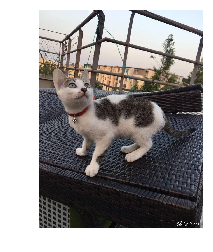

/home/gezi/data2/data/shijue/pic.fangshu/猫01.jpg
一个 戴着 墨镜 的 女人 站 在 室外 的 栏杆 旁 </S> 0.0102805
一个 戴着 墨镜 的 女人 站 在 室外 的 护栏 旁 </S> 0.00940442
一个 戴着 墨镜 的 女人 站 在 室外 的 道路 上 </S> 0.00854715
一个 戴着 墨镜 的 女人 站 在 室外 的 围栏 旁 </S> 0.00804222
一个 戴着 墨镜 的 女人 站 在 道路 上 的 护栏 旁 </S> 0.00734346
一个 戴着 帽子 的 女人 站 在 室外 的 栏杆 旁 </S> 0.00721291
一个 戴着 帽子 的 女人 站 在 室外 的 护栏 旁 </S> 0.00677717
一个 戴着 墨镜 的 女人 站 在 室外 的 道路 上 逗 狗 </S> 0.0048898
一个 戴着 墨镜 的 女人 站 在 室外 的 栏杆 旁 逗 狗 </S> 0.00383549
一只 狗 旁 有 一个 戴着 墨镜 的 女人 站 在 道路 上 </S> 0.00371263
beam search using time(ms): 503.28207016


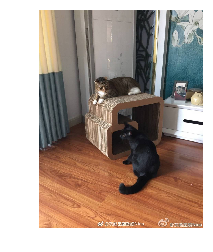

/home/gezi/data2/data/shijue/pic.fangshu/猫02.jpg
房间 里 有 一个 坐在 椅子 上 的 女人 在 看电视 </S> 0.0210271
房间 里 有 一个 坐在 沙发 上 的 女人 在 看电视 </S> 0.0165202
房间 里 一只 猫 的 旁边 有 一个 坐在 椅子 上 的 女人 在 看电视 </S> 0.0156522
房间 里 一只 猫 的 旁边 有 一个 站 着 的 女人 在 看电视 </S> 0.0156269
房间 里 有 一个 坐在 椅子 上 的 女人 在 逗 猫 </S> 0.0150962
房间 里 有 一个 坐在 椅子 上 的 女人 在 看 猫 </S> 0.0110367
房间 里 一只 猫 的 旁边 有 一个 站 着 的 女人 在 逗 猫 </S> 0.0102112
房间 里 一只 猫 的 旁边 有 一个 戴着 眼镜 的 男人 坐在 椅子 上 </S> 0.00800931
房间 里 一只 猫 的 旁边 有 一个 戴着 眼镜 的 女人 坐在 椅子 上 </S> 0.00799317
房间 里 一只 猫 的 旁边 有 一个 坐在 椅子 上 的 男人 在 看电视 </S> 0.00727609
beam search using time(ms): 522.082805634


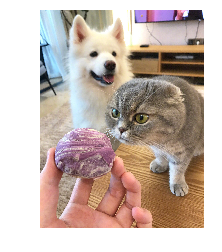

/home/gezi/data2/data/shijue/pic.fangshu/猫03.jpg
房间 里 一只 猫 的 旁边 坐 着 一个 双手 抱 着 猫 的 女人 </S> 0.0169966
一只 猫 的 旁边 有 一个 双手 抱 着 猫 的 女人 坐在 房间 里 </S> 0.0144746
一只 猫 的 旁边 有 一个 双手 拿 着 东西 的 小孩 坐在 房间 里 </S> 0.0140971
房间 里 一只 猫 的 旁边 坐 着 一个 双手 拿 着 东西 的 孩子 </S> 0.0137287
一只 猫 的 旁边 有 一个 双手 拿 着 东西 的 孩子 坐在 房间 里 </S> 0.0127409
一只 猫 的 旁边 有 一个 双手 抱 着 猫 的 小孩 坐在 房间 里 </S> 0.0118865
一只 猫 的 旁边 有 一个 双手 抱 着 猫 的 孩子 坐在 房间 里 </S> 0.0118431
一只 猫 的 旁边 有 一个 双手 拿 着 东西 的 小孩 坐在 房间 里 的 地板 上 </S> 0.0118236
一只 猫 的 旁边 有 一个 双手 拿 着 东西 的 女人 坐在 房间 里 </S> 0.0111351
一只 猫 的 旁边 有 一个 双手 拿 着 玩具 的 小孩 坐在 房间 里 </S> 0.0109026
beam search using time(ms): 538.988828659


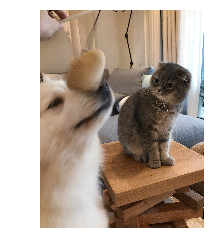

/home/gezi/data2/data/shijue/pic.fangshu/猫04.jpg
房间 里 有 一个 坐在 沙发 上 的 女人 在 逗 猫 </S> 0.0376329
屋子里 有 一个 坐在 沙发 上 的 女人 在 逗 猫 </S> 0.0362262
屋子里 有 一个 坐在 沙发 上 的 男人 在 逗 猫 </S> 0.0236829
房间 里 有 一个 坐在 沙发 上 的 男人 在 逗 猫 </S> 0.0231486
房间 里 一只 猫 的 旁边 有 一个 坐在 沙发 上 的 女人 在 逗 猫 </S> 0.0231268
房间 里 有 一个 坐在 沙发 上 的 女人 在 逗 一只 猫 </S> 0.0204317
房间 里 有 一个 双手 拿 着 猫 的 女人 在 逗 猫 </S> 0.0184998
房间 里 有 一个 坐在 沙发 上 的 男人 在 逗 一只 猫 </S> 0.0140926
房间 里 一只 猫 的 旁边 有 一个 坐在 沙发 上 的 男人 在 逗 猫 </S> 0.0126525
一只 猫 的 旁边 有 一个 双手 拿 着 猫 的 女人 坐在 房间 里 的 沙发 上 </S> 0.0124198
beam search using time(ms): 584.622144699


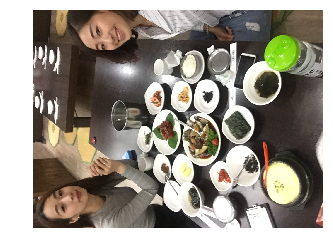

/home/gezi/data2/data/shijue/pic.fangshu/美食01.jpg
房间 里 有 一个 双手 拿 着 手机 的 女人 在 给 一个 躺 在 地上 的 女人 拍照 </S> 0.00562312
房间 里 有 一个 双手 拿 着 手机 的 女人 在 给 一个 躺 在 床上 的 女人 拍照 </S> 0.00559026
房间 里 有 一个 右手 拿 着 手机 的 女人 在 给 一个 躺 在 椅子 上 的 女人 拍照 </S> 0.00478425
房间 里 有 一个 右手 拿 着 手机 的 女人 在 给 一个 躺 在 椅子 上 的 男人 拍照 </S> 0.00456827
房间 里 有 一个 左手 拿 着 手机 的 女人 在 给 一个 躺 在 床上 的 人 拍照 </S> 0.00443609
房间 里 有 一个 右手 拿 着 手机 的 女人 在 给 一个 躺 在 椅子 上 的 人 拍照 </S> 0.00426518
房间 里 有 一个 左手 拿 着 手机 的 女人 在 给 一个 躺 在 床上 的 女人 拍照 </S> 0.00405009
屋子里 有 一个 双手 拿 着 东西 的 女人 在 给 一个 躺 在 椅子 上 的 女人 拍照 </S> 0.00299732
屋子里 有 一个 右手 拿 着 东西 的 女人 在 给 一个 躺 在 椅子 上 的 人 递 东西 </S> 0.00212405
房间 里 有 一个 双手 拿 着 东西 的 女人 在 给 一个 躺 在 床上 的 女人 做 护理 </S> 0.00145781
beam search using time(ms): 511.265993118


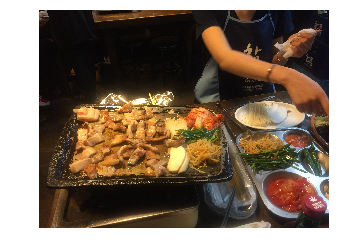

/home/gezi/data2/data/shijue/pic.fangshu/美食02.jpg
房间 里 有 一个 右手 拿 着 刀 的 男人 在 切 食物 </S> 0.0157077
房间 里 有 一个 右手 拿 着 刀 的 男人 在 切 蛋糕 </S> 0.0141579
房间 里 有 一个 穿着 黑色 上衣 的 女人 在 切 蛋糕 </S> 0.0139897
房间 里 有 一个 右手 拿 着 刀 的 女人 在 切 蛋糕 </S> 0.013468
房间 里 有 一个 戴着 帽子 的 男人 在 切 蛋糕 </S> 0.0134468
房间 里 有 一个 戴着 眼镜 的 男人 在 切 蛋糕 </S> 0.0127123
房间 里 有 一个 右手 拿 着 刀 的 女人 在 切 食物 </S> 0.0098262
房间 里 有 一个 右手 拿 着 刀 的 男人 在 切 东西 </S> 0.00688272
房间 里 有 一个 穿着 黑色 短袖 的 男人 在 给 一个 戴着 眼镜 的 男人 递 食物 </S> 0.00401805
房间 里 有 一个 穿着 黑色 上衣 的 男人 在 给 一个 戴着 眼镜 的 男人 递 食物 </S> 0.0033452
beam search using time(ms): 639.403104782


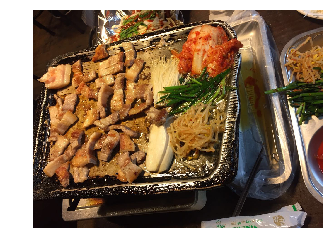

/home/gezi/data2/data/shijue/pic.fangshu/美食03.jpg
室外 有 一个 戴着 帽子 的 男人 在 制作 食物 </S> 0.0138953
屋子里 有 一个 戴着 帽子 的 男人 在 制作 食物 </S> 0.0138878
室外 有 一个 戴着 帽子 的 男人 在 做 食物 </S> 0.0111771
室外 有 一个 戴着 帽子 的 男人 站 在 摆满 食物 的 桌子 旁 </S> 0.0104487
一个 双手 拿 着 东西 的 男人 站 在 商店 里 </S> 0.00921257
一个 戴着 帽子 的 男人 在 室内 的 桌子 旁 制作 食物 </S> 0.00616464
一个 戴着 帽子 的 男人 在 室内 的 桌子 旁 盛菜 </S> 0.00448692
一个 戴着 帽子 的 男人 站 在 商店 里 的 桌子 旁 </S> 0.00446117
一个 双手 拿 着 东西 的 男人 站 在 室内 的 桌子 旁 </S> 0.00440918
一个 双手 拿 着 东西 的 男人 站 在 室外 的 桌子 旁 </S> 0.00413976
beam search using time(ms): 526.084899902


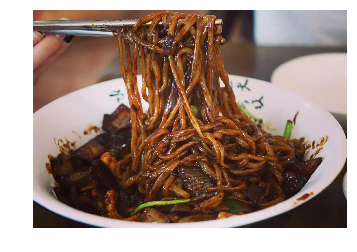

/home/gezi/data2/data/shijue/pic.fangshu/美食-面条01.jpg
餐厅 里 有 一个 右手 拿 着 筷子 的 女人 在 做 食物 </S> 0.0137596
房间 里 有 一个 双手 拿 着 东西 的 女人 坐在 桌子 旁 </S> 0.0114345
一个 双手 拿 着 东西 的 女人 坐在 餐厅 里 </S> 0.0113459
一个 双手 拿 着 东西 的 女人 坐在 餐厅 里 的 桌子 旁 </S> 0.0112729
餐厅 里 有 一个 右手 拿 着 筷子 的 女人 在 夹 食物 </S> 0.010966
餐厅 里 有 一个 右手 拿 着 筷子 的 女人 在 倒 龙虾 </S> 0.00902785
餐厅 里 有 一个 右手 拿 着 筷子 的 女人 在 倒 东西 </S> 0.00808713
房间 里 有 一个 右手 拿 着 筷子 的 女人 在 倒 东西 </S> 0.00759212
餐厅 里 有 一个 右手 拿 着 筷子 的 女人 在 往 锅里 倒 东西 </S> 0.0046664
餐厅 里 有 一个 右手 拿 着 勺子 的 女人 在 往 锅里 倒 东西 </S> 0.0039161
beam search using time(ms): 515.157938004


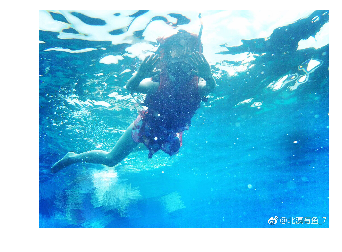

/home/gezi/data2/data/shijue/pic.fangshu/潜水01.jpg
一个 穿着 潜水服 的 人 在 蔚蓝 的 海水 里 潜水 </S> 0.0819314
一个 穿着 潜水服 的 人 在 清澈 的 海水 里 潜水 </S> 0.0542568
一个 穿着 潜水服 的 人 在 蔚蓝 的 大 海里 潜水 </S> 0.0522703
一个 穿着 潜水服 的 人 在 蔚蓝 的 海里 潜水 </S> 0.0505129
一个 穿着 潜水服 的 人 在 碧蓝 的 海水 里 潜水 </S> 0.0488271
清澈 的 海水 里 有 一个 穿着 潜水服 的 人 在 潜水 </S> 0.0485686
一个 穿着 潜水服 的 人 在 清澈 的 海里 潜水 </S> 0.0474257
海底 有 一个 穿着 潜水服 的 人 在 潜水 </S> 0.0456824
一个 穿着 潜水服 的 人 在 湛蓝 的 海水 里 潜水 </S> 0.0433822
一个 戴着 氧气 罩 的 人 在 蔚蓝 的 海里 潜水 </S> 0.0394071
beam search using time(ms): 528.464794159


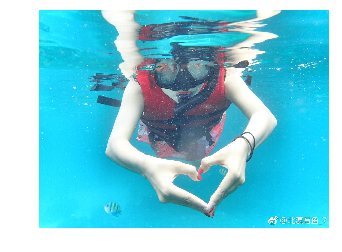

/home/gezi/data2/data/shijue/pic.fangshu/潜水02.jpg
清澈 的 泳池 里 有 一个 穿着 泳衣 的 女人 在 潜水 </S> 0.0448814
清澈 的 泳池 里 有 一个 穿着 泳衣 的 女人 在 游泳 </S> 0.0371068
清澈 的 水池 里 有 一个 穿着 泳衣 的 女人 在 潜水 </S> 0.0355842
一个 穿着 泳衣 的 女人 在 清澈 的 水池 里 潜水 </S> 0.0312488
清澈 的 泳池 里 有 一个 穿着 潜水服 的 女人 在 潜水 </S> 0.0308534
一个 双手 放在 身前 的 女人 站 在 清澈 的 水池 里 </S> 0.0306563
清澈 的 水池 里 有 一个 穿着 泳衣 的 女人 在 游泳 </S> 0.0287581
清澈 的 泳池 里 有 一个 戴着 泳镜 的 女人 在 游泳 </S> 0.0284298
清澈 的 泳池 里 有 一个 戴着 泳镜 的 女人 在 潜水 </S> 0.0273662
清澈 的 水池 里 有 一个 穿着 潜水服 的 女人 在 潜水 </S> 0.0243797
beam search using time(ms): 548.06804657


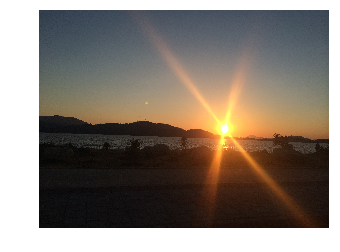

/home/gezi/data2/data/shijue/pic.fangshu/日出日落01.jpg
一个 右手 拿 着 话筒 的 男人 在 舞台 上 唱歌 </S> 0.0137792
一个 右手 拿 着 话筒 的 男人 在 舞台 上 讲话 </S> 0.0136663
一个 右手 拿 着 话筒 的 女人 在 舞台 上 唱歌 </S> 0.0122197
一个 右手 拿 着 话筒 的 男人 在 舞台 上 表演 </S> 0.0122193
一个 右手 拿 着 话筒 的 男人 站 在 舞台 上 </S> 0.0117688
一个 右手 拿 着 话筒 的 男人 在 舞台 上 说话 </S> 0.0115558
一个 右手 拿 着 话筒 的 女人 在 舞台 上 讲话 </S> 0.0104977
一个 右手 拿 着 话筒 的 女人 在 舞台 上 表演 </S> 0.00994729
一个 戴着 帽子 的 男人 在 道路 上 骑 自行车 </S> 0.00989584
一个 右手 拿 着 话筒 的 男人 站 在 舞台 上 讲话 </S> 0.00972961
beam search using time(ms): 676.93901062


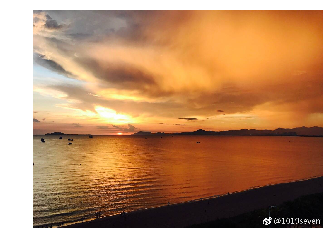

/home/gezi/data2/data/shijue/pic.fangshu/日出日落02.jpg
一个 戴着 帽子 的 人 站 在 海边 的 沙滩 上 </S> 0.0226213
一个 双手 拿 着 东西 的 人 站 在 海边 的 沙滩 上 </S> 0.0163357
一个 双手 拿 着 东西 的 女人 站 在 海边 的 沙滩 上 </S> 0.0146521
一个 双手 拿 着 东西 的 人 站 在 一望无际 的 海边 </S> 0.0125342
海边 的 沙滩 上 站 着 一个 双手 拿 着 东西 的 人 </S> 0.0111578
一望无际 的 海边 站 着 一个 双手 拿 着 东西 的 人 </S> 0.0104588
一望无际 的 大 海边 站 着 一个 双手 拿 着 东西 的 人 </S> 0.0101676
一望无际 的 大 海边 站 着 一个 右手 拿 着 东西 的 人 </S> 0.00859186
海边 的 沙滩 上 站 着 一个 双手 拿 着 东西 的 女人 </S> 0.00819764
一望无际 的 大 海边 站 着 一个 双手 拿 着 东西 的 女人 </S> 0.0081332
beam search using time(ms): 532.910823822


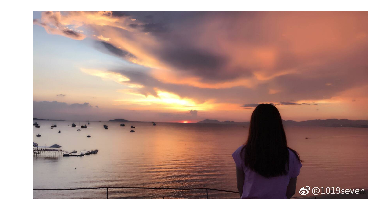

/home/gezi/data2/data/shijue/pic.fangshu/日出日落03.jpg
一个 披 着 头发 的 女人 站 在 海边 的 沙滩 上 </S> 0.04181
一个 披 着 长发 的 女人 站 在 海边 的 沙滩 上 </S> 0.0417896
一个 穿着 裙子 的 女人 站 在 海边 的 沙滩 上 </S> 0.0412919
海边 的 沙滩 上 站 着 一个 披 着 头发 的 女人 </S> 0.0382703
海边 的 沙滩 上 站 着 一个 披 着 长发 的 女人 </S> 0.0377099
一个 穿着 连衣裙 的 女人 站 在 海边 的 沙滩 上 </S> 0.0371989
一个 披 着 头发 的 女人 坐在 海边 的 石头 上 </S> 0.0309942
一个 披 着 头发 的 女人 坐在 海边 的 沙滩 上 </S> 0.0307157
一个 披 着 头发 的 女人 站 在 海边 的 石头 上 </S> 0.0236558
一个 披 着 长发 的 女人 站 在 海边 的 石头 上 </S> 0.0213751
beam search using time(ms): 521.198987961


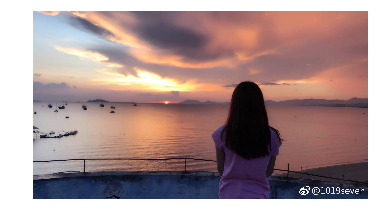

/home/gezi/data2/data/shijue/pic.fangshu/日出日落04.jpg
一个 披 着 头发 的 女人 站 在 湖边 的 道路 上 </S> 0.0468445
一个 披 着 长发 的 女人 站 在 湖边 的 道路 上 </S> 0.035944
一个 穿着 裙子 的 女人 站 在 湖边 的 道路 上 </S> 0.0359206
一个 披 着 头发 的 女人 站 在 河边 的 道路 上 </S> 0.0319282
一个 披 着 头发 的 女人 站 在 海边 的 道路 上 </S> 0.0317936
一个 长 头发 的 女人 站 在 湖边 的 道路 上 </S> 0.0315366
一个 披 着 头发 的 女人 坐在 湖边 的 石台 上 </S> 0.0289988
一个 披 着 头发 的 女人 站 在 湖边 的 栏杆 旁 </S> 0.0267591
一个 披 着 长发 的 女人 站 在 海边 的 道路 上 </S> 0.023798
一个 披 着 头发 的 女人 站 在 海边 的 栏杆 旁 </S> 0.0211108
beam search using time(ms): 509.882926941


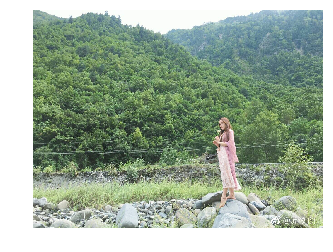

/home/gezi/data2/data/shijue/pic.fangshu/山01.jpg
一个 穿着 连衣裙 的 女人 站 在 河边 的 石头 上 </S> 0.0592966
一个 穿着 裙子 的 女人 站 在 河边 的 石头 上 </S> 0.0447101
河边 的 石头 上 站 着 一个 双手 放在 身前 的 女人 </S> 0.0296138
一个 双手 放在 身前 的 女人 站 在 河边 的 石头 上 </S> 0.0286131
河边 的 石头 上 站 着 一个 穿着 连衣裙 的 女人 </S> 0.025429
河边 的 石头 上 站 着 一个 穿着 裙子 的 女人 </S> 0.0233267
一个 双手 放在 身前 的 女人 站 在 湖边 的 石头 上 </S> 0.0208218
河边 的 石头 上 站 着 一个 右手 放在 身前 的 女人 </S> 0.0136714
河边 的 石头 上 站 着 一个 左手 放在 身前 的 女人 </S> 0.0123736
一个 穿着 连衣裙 的 女人 站 在 河边 的 岩石 上 </S> 0.00980629
beam search using time(ms): 515.701770782


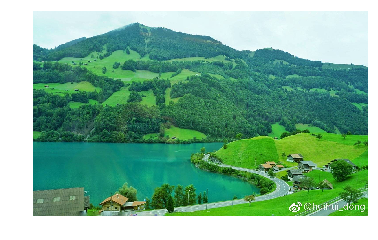

/home/gezi/data2/data/shijue/pic.fangshu/山02.jpg
一个 戴着 帽子 的 人 坐在 风景秀丽 的 湖边 </S> 0.0100994
一个 戴着 帽子 的 人 坐在 湖边 的 石头 上 </S> 0.00865038
一个 背着 包 的 女人 站 在 风景秀丽 的 湖边 </S> 0.00853027
一个 戴着 帽子 的 女人 坐在 湖边 的 石头 上 </S> 0.00782165
一个 背着 包 的 女人 站 在 风景优美 的 湖边 </S> 0.00736484
一个 戴着 帽子 的 人 坐在 湖边 的 栏杆 上 </S> 0.00716404
一个 戴着 帽子 的 人 坐在 湖边 的 护栏 上 </S> 0.00667697
一个 戴着 帽子 的 人 站 在 湖边 的 栏杆 旁 </S> 0.00655204
一个 背着 包 的 女人 站 在 湖边 的 栏杆 旁 </S> 0.00601204
一个 戴着 帽子 的 人 坐在 风景秀丽 的 湖边 看 风景 </S> 0.00467667
beam search using time(ms): 503.15284729


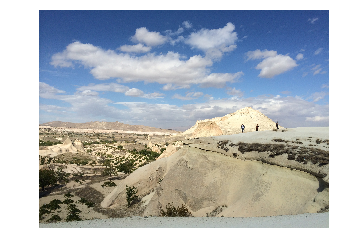

/home/gezi/data2/data/shijue/pic.fangshu/天空01.jpg
蔚蓝 的 天空 下 有 一个 戴着 帽子 的 人 站 在 山顶 上 </S> 0.0157292
蔚蓝 的 天空 下 有 一个 戴着 帽子 的 男人 站 在 山顶 上 </S> 0.0122744
蔚蓝 的 天空 下 有 一个 戴着 帽子 的 人 站 在 山上 </S> 0.0120437
蔚蓝 的 天空 下 有 一个 右手 拿 着 相机 的 男人 站 在 山顶 上 </S> 0.0112471
蔚蓝 的 天空 下 有 一个 双手 拿 着 相机 的 男人 站 在 山顶 上 </S> 0.00960243
蔚蓝 的 天空 下 有 一个 双手 拿 着 相机 的 人 站 在 山顶 上 </S> 0.00950501
蔚蓝 的 天空 下 有 一个 双手 拿 着 相机 的 男人 在 拍照 </S> 0.00860088
蔚蓝 的 天空 下 有 一个 双手 拿 着 相机 的 男人 站 在 道路 上 </S> 0.00792755
蔚蓝 的 天空 下 有 一个 双手 拿 着 相机 的 人 在 拍照 </S> 0.0077685
蔚蓝 的 天空 下 有 一个 右手 拿 着 相机 的 男人 站 在 山坡 上 </S> 0.00759119
beam search using time(ms): 601.152896881


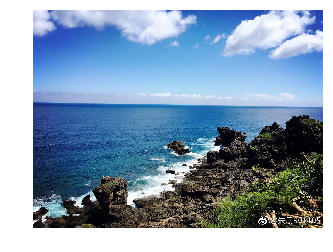

/home/gezi/data2/data/shijue/pic.fangshu/天空02.jpg
一望无际 的 海边 有 一个 背着 包 的 女人 坐在 石头 上 </S> 0.0114178
一望无际 的 海边 有 一个 背着 包 的 女人 站 在 石头 上 </S> 0.0110756
一望无际 的 海边 有 一个 背着 双肩包 的 女人 坐在 石头 上 </S> 0.00964795
一望无际 的 海边 有 一个 背着 双肩包 的 女人 站 在 石头 上 </S> 0.00941841
一望无际 的 海边 有 一个 背着 包 的 女人 站 在 礁石 上 </S> 0.00731021
一望无际 的 海边 有 一个 背着 包 的 女人 站 在 石头 旁 </S> 0.00548256
海边 的 礁石 上 坐 着 一个 右手 拿 着 手机 的 女人 </S> 0.0052739
海边 的 石头 上 站 着 一个 右手 拿 着 手机 的 女人 </S> 0.00520675
海边 的 石头 上 站 着 一个 双手 拿 着 相机 的 女人 </S> 0.00492823
海边 的 沙滩 上 站 着 一个 双手 拿 着 相机 的 女人 </S> 0.00488225
beam search using time(ms): 520.527839661


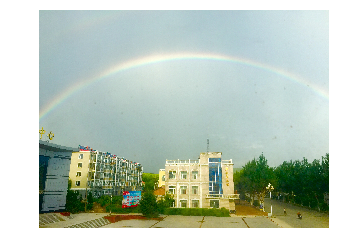

/home/gezi/data2/data/shijue/pic.fangshu/天空03.jpg
一个 戴着 帽子 的 男人 站 在 室外 的 草地 上 </S> 0.00418074
一个 戴着 帽子 的 男人 站 在 室外 的 道路 上 </S> 0.00406939
一个 右手 拿 着 东西 的 男人 走 在 道路 上 </S> 0.00398336
一个 戴着 帽子 的 人 站 在 室外 的 道路 上 </S> 0.0039331
一个 穿着 黑色 裤子 的 男人 站 在 道路 上 </S> 0.00350705
一个 右手 拿 着 东西 的 男人 走 在 宽阔 的 道路 上 </S> 0.00279963
一个 右手 拿 着 东西 的 男人 站 在 室外 的 草地 上 </S> 0.00234272
一个 右手 拿 着 东西 的 男人 站 在 室外 的 道路 上 </S> 0.0022536
一个 穿着 黑色 裤子 的 男人 站 在 室外 的 道路 上 </S> 0.00224237
一个 穿着 白色 上衣 的 男人 站 在 室外 的 道路 上 </S> 0.00213534
beam search using time(ms): 619.296073914


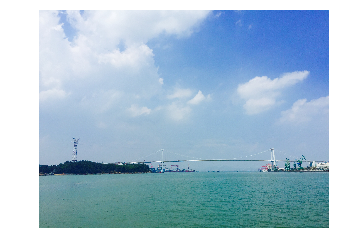

/home/gezi/data2/data/shijue/pic.fangshu/天空04.jpg
一个 戴着 帽子 的 人 站 在 海边 的 栏杆 旁 </S> 0.0127537
一个 戴着 帽子 的 男人 站 在 海边 的 栏杆 旁 </S> 0.0107277
一个 戴着 帽子 的 女人 站 在 海边 的 栏杆 旁 </S> 0.0106207
一个 戴着 帽子 的 人 站 在 海边 的 护栏 旁 </S> 0.00851414
一个 戴着 帽子 的 人 在 海边 的 道路 上 跑步 </S> 0.00687376
海边 的 沙滩 上 有 一个 戴着 帽子 的 男人 在 钓鱼 </S> 0.00537593
海边 的 沙滩 上 有 一个 戴着 帽子 的 人 在 钓鱼 </S> 0.00516241
一个 戴着 帽子 的 人 在 海边 的 道路 上 钓鱼 </S> 0.00496386
一个 戴着 帽子 的 人 站 在 海边 的 栏杆 旁 钓鱼 </S> 0.0039782
海边 的 沙滩 上 站 着 一个 双手 拿 着 东西 的 女人 </S> 0.00348601
beam search using time(ms): 576.135158539


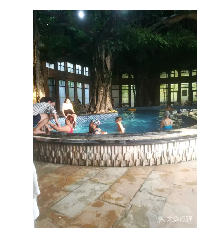

/home/gezi/data2/data/shijue/pic.fangshu/温泉01.jpg
室外 的 泳池 里 坐 着 一群 穿着 各异 的 人 </S> 0.0174944
室外 的 泳池 里 坐 着 四个 穿着 各异 的 人 </S> 0.0135427
室外 的 泳池 里 坐 着 一群 穿着 泳衣 的 人 </S> 0.0131061
室外 的 泳池 边 坐 着 一群 穿着 各异 的 人 </S> 0.0130994
一群 衣着 各异 的 人 坐在 室外 的 泳池 里 </S> 0.0118051
室外 的 泳池 里 坐 着 四个 穿着 泳衣 的 人 </S> 0.0106861
室外 的 泳池 里 有 一群 穿着 各异 的 人 在 交谈 </S> 0.0104709
室外 的 泳池 里 坐 着 一群 戴着 帽子 的 人 </S> 0.0100616
室外 的 泳池 里 坐 着 一群 戴着 帽子 的 小孩子 </S> 0.00977278
室外 的 泳池 里 坐 着 四个 戴着 帽子 的 人 </S> 0.00960751
beam search using time(ms): 515.221834183


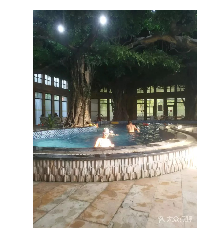

/home/gezi/data2/data/shijue/pic.fangshu/温泉02.jpg
泳池 边 的 石台 上 坐 着 一位 穿着 裙子 的 女士 </S> 0.00887549
室外 的 泳池 边 坐 着 一个 双手 放在 腿 上 的 女人 </S> 0.00862532
泳池 边 的 石台 上 坐 着 一位 双手 搭 在 腿 上 的 女士 </S> 0.00855547
泳池 边 的 石台 上 坐 着 一位 戴着 帽子 的 女士 </S> 0.00734083
室外 的 泳池 边 坐 着 一个 戴着 帽子 的 女人 </S> 0.00716402
泳池 边 的 石台 上 坐 着 一位 戴着 墨镜 的 女士 </S> 0.00690949
室外 的 泳池 边 坐 着 一个 戴着 帽子 的 人 </S> 0.00679629
泳池 边 的 石台 上 坐 着 一位 戴着 帽子 的 男士 </S> 0.00636022
室外 的 泳池 边 坐 着 一个 戴着 帽子 的 男人 </S> 0.00628531
泳池 边 的 石台 上 坐 着 一位 双手 搭 在 腿 上 的 男士 </S> 0.00599423
beam search using time(ms): 536.071062088


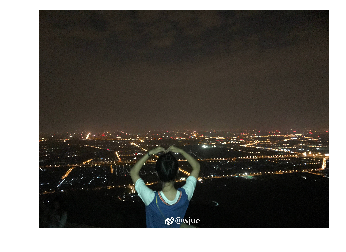

/home/gezi/data2/data/shijue/pic.fangshu/夜景01.jpg
一个 双手 举起 的 女人 站 在 昏暗 的 道路 上 </S> 0.0311197
一个 双手 举起 的 女人 站 在 昏暗 的 天 台上 </S> 0.0168385
一个 双手 举起 的 女人 在 道路 上 腾空 跃起 </S> 0.0166177
一个 双手 举起 的 女人 站 在 室外 的 道路 上 </S> 0.0165661
一个 双手 放在 头上 的 女人 站 在 道路 上 </S> 0.0162439
一个 双手 抬起 的 女人 站 在 昏暗 的 道路 上 </S> 0.0161432
一个 双手 举着 东西 的 女人 站 在 道路 上 </S> 0.0160038
一个 双手 放在 头上 的 女人 站 在 天 台上 </S> 0.0149606
一个 双手 举起 的 女人 站 在 道路 上 </S> 0.013222
一个 双手 举起 的 女人 站 在 昏暗 的 室外 </S> 0.0131885
beam search using time(ms): 757.02881813


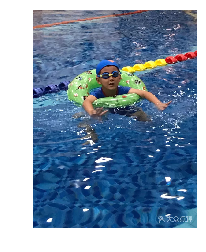

/home/gezi/data2/data/shijue/pic.fangshu/游泳01.jpg
游泳池 里 有 一个 戴着 泳镜 的 男孩 在 游泳 </S> 0.082205
游泳池 里 有 一个 戴着 泳镜 的 男人 在 游泳 </S> 0.0696479
游泳池 里 有 一个 戴着 泳镜 的 孩子 在 游泳 </S> 0.0582705
一个 戴着 泳镜 的 男人 在 游泳池 里 游泳 </S> 0.0553359
泳池 里 有 一个 戴着 泳镜 的 男孩 在 游泳 </S> 0.0543024
游泳池 里 有 一个 戴着 泳镜 的 人 在 游泳 </S> 0.0485182
泳池 里 有 一个 戴着 泳镜 的 男人 在 游泳 </S> 0.0457332
两个 戴着 泳镜 的 人 在 清澈 的 泳池 里 游泳 </S> 0.038761
一个 戴着 泳镜 的 人 在 清澈 的 泳池 里 游泳 </S> 0.0375872
清澈 的 泳池 里 有 一个 戴着 泳镜 的 人 在 游泳 </S> 0.0353235
beam search using time(ms): 533.972978592


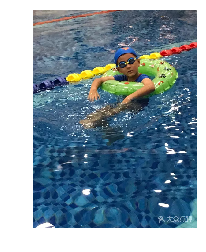

/home/gezi/data2/data/shijue/pic.fangshu/游泳02.jpg
游泳池 里 有 一个 戴着 泳镜 的 人 在 游泳 </S> 0.105009
游泳池 里 有 两个 戴着 泳镜 的 人 在 游泳 </S> 0.0964941
游泳池 里 有 两个 戴着 泳帽 的 人 在 游泳 </S> 0.0694755
泳池 里 有 一个 戴着 泳镜 的 人 在 游泳 </S> 0.0632463
泳池 里 有 两个 戴着 泳镜 的 人 在 游泳 </S> 0.0605563
游泳池 里 有 一个 戴着 泳镜 的 男人 在 游泳 </S> 0.058308
一个 戴着 泳镜 的 人 在 游泳池 里 游泳 </S> 0.0558031
一个 戴着 泳镜 的 人 在 清澈 的 泳池 里 游泳 </S> 0.0520499
清澈 的 泳池 里 有 两个 戴着 泳镜 的 人 在 游泳 </S> 0.0481714
两个 戴着 泳镜 的 人 在 游泳池 里 游泳 </S> 0.0364359
beam search using time(ms): 525.177955627


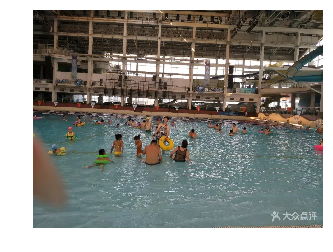

/home/gezi/data2/data/shijue/pic.fangshu/游泳馆01.jpg
游泳馆 里 有 一群 穿着 泳装 的 人 在 玩耍 </S> 0.029969
游泳馆 里 有 一群 穿着 泳衣 的 人 在 玩耍 </S> 0.0226648
一群 穿着 泳装 的 人 站 在 清澈 的 泳池 里 </S> 0.0180781
一群 穿着 泳衣 的 人 站 在 清澈 的 泳池 里 </S> 0.0167492
一群 穿着 泳装 的 人 站 在 清澈 的 水池 里 </S> 0.0150274
一群 穿着 泳装 的 人 站 在 清澈 的 泳池 边 </S> 0.0149603
游泳馆 里 有 一群 穿着 泳装 的 人 在 游泳 </S> 0.0146973
游泳馆 里 有 一群 穿着 泳衣 的 人 在 游泳 </S> 0.0143234
一群 穿着 泳衣 的 人 站 在 清澈 的 泳池 边 </S> 0.0142445
宽敞 的 游泳馆 里 有 一群 穿着 泳装 的 人 在 玩耍 </S> 0.0116577
beam search using time(ms): 518.465042114


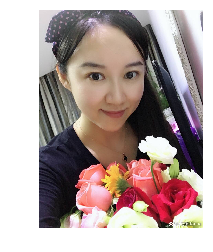

/home/gezi/data2/data/shijue/pic.fangshu/自拍01.jpg
一个 双手 捧 着 蛋糕 的 女人 坐在 汽车 里 </S> 0.0492837
一个 双手 捧 着 花 的 女人 坐在 汽车 里 </S> 0.0486331
一个 双手 捧 着 蛋糕 的 女人 站 在 道路 上 的 汽车 旁 </S> 0.0451734
一个 双手 捧 着 花 的 女人 站 在 道路 上 的 汽车 旁 </S> 0.0446161
一个 双手 捧 着 蛋糕 的 女人 站 在 汽车 里 </S> 0.0360288
一个 双手 捧 着 花 的 女人 站 在 汽车 里 </S> 0.0336791
道路 上 有 一个 双手 捧 着 花 的 女人 站 在 汽车 旁 </S> 0.0316199
道路 上 有 一个 双手 捧 着 花 的 女人 坐在 汽车 里 </S> 0.0312273
一个 双手 捧 着 花 的 女人 面带微笑 地站 在 汽车 里 </S> 0.0294688
一个 双手 捧 着 蛋糕 的 女人 面带微笑 地站 在 汽车 里 </S> 0.0282489
beam search using time(ms): 526.355981827


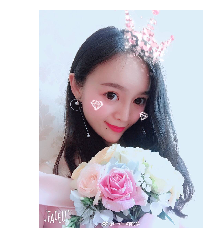

/home/gezi/data2/data/shijue/pic.fangshu/自拍02.jpg
房间 里 站 着 一个 双手 捧 着 蛋糕 的 女人 </S> 0.105533
房间 里 站 着 一个 双手 拿 着 蛋糕 的 女人 </S> 0.0559191
明亮 的 房间 里 站 着 一个 双手 捧 着 蛋糕 的 女人 </S> 0.0537445
一个 双手 捧 着 蛋糕 的 女人 站 在 房间 里 </S> 0.0500766
一个 双手 捧 着 蛋糕 的 女人 站 在 室内 </S> 0.0408131
一个 双手 捧 着 蛋糕 的 女人 站 在 屋子里 </S> 0.0380134
明亮 的 房间 里 站 着 一个 双手 拿 着 蛋糕 的 女人 </S> 0.0300667
房间 里 有 一个 双手 捧 着 蛋糕 的 女人 坐在 沙发 上 </S> 0.0292654
一个 双手 捧 着 蛋糕 的 女人 面带微笑 地站 在 室内 </S> 0.0278457
一个 双手 捧 着 蛋糕 的 女人 面带微笑 地站 在 屋子里 </S> 0.0275167
beam search using time(ms): 508.683919907


In [6]:
import glob 
for img in glob.glob('/home/gezi/data2/data/shijue/pic.fangshu/*.jpg'):
    image_show(img)
    predict(img, predictor)